C:\Users\abiji\AppData\Local\Temp\ipykernel_16492\3044094503.py:82: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\abiji\AppData\Local\Temp\ipykernel_16492\3044094503.py:83: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.savefig("recursive_bs_performance.png", dpi=300)
c:\Users\abiji\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


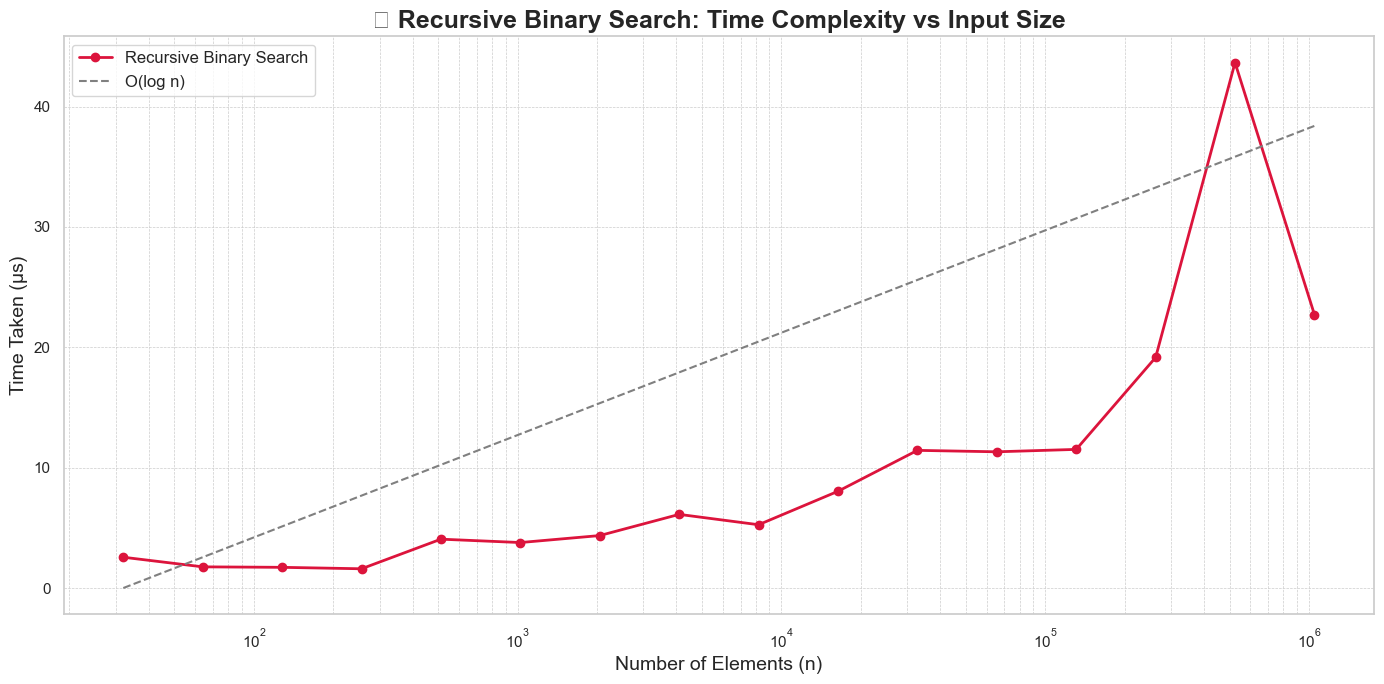


📌 Recursive Binary Search Highlights
- Fastest Time (@ n=32): 2.56 μs
- Slowest Time (@ n=1048576): 22.72 μs
- Expected Time Complexity: O(log n)
- Observed growth matches logarithmic trend



C:\Users\abiji\AppData\Local\Temp\ipykernel_16492\3044094503.py:110: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\abiji\AppData\Local\Temp\ipykernel_16492\3044094503.py:111: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.savefig("performance_comparison_loglog.png", dpi=300)
c:\Users\abiji\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


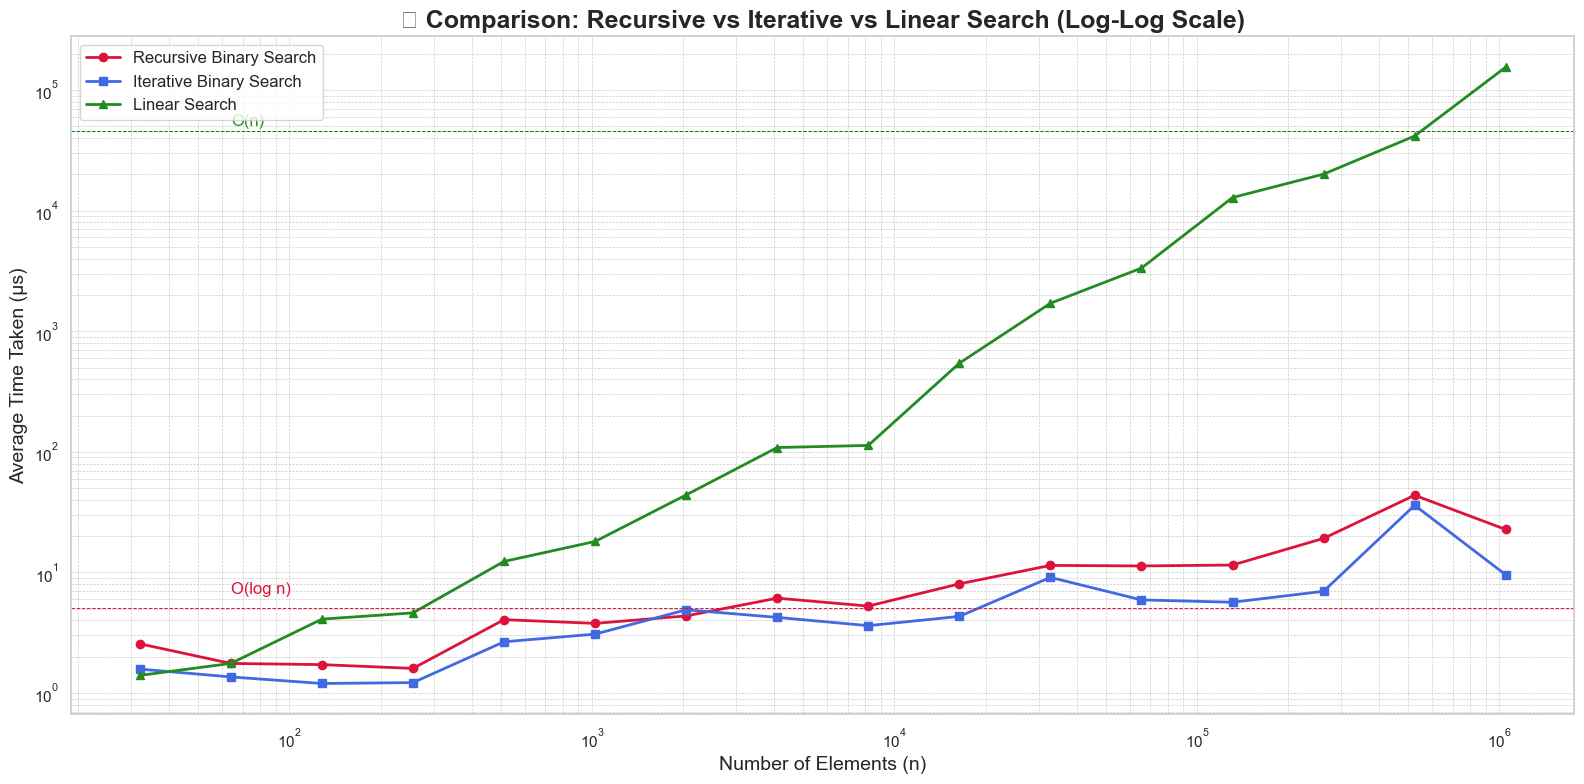

C:\Users\abiji\AppData\Local\Temp\ipykernel_16492\3044094503.py:133: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\abiji\AppData\Local\Temp\ipykernel_16492\3044094503.py:134: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig("bar_chart_max_n.png", dpi=300)
c:\Users\abiji\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


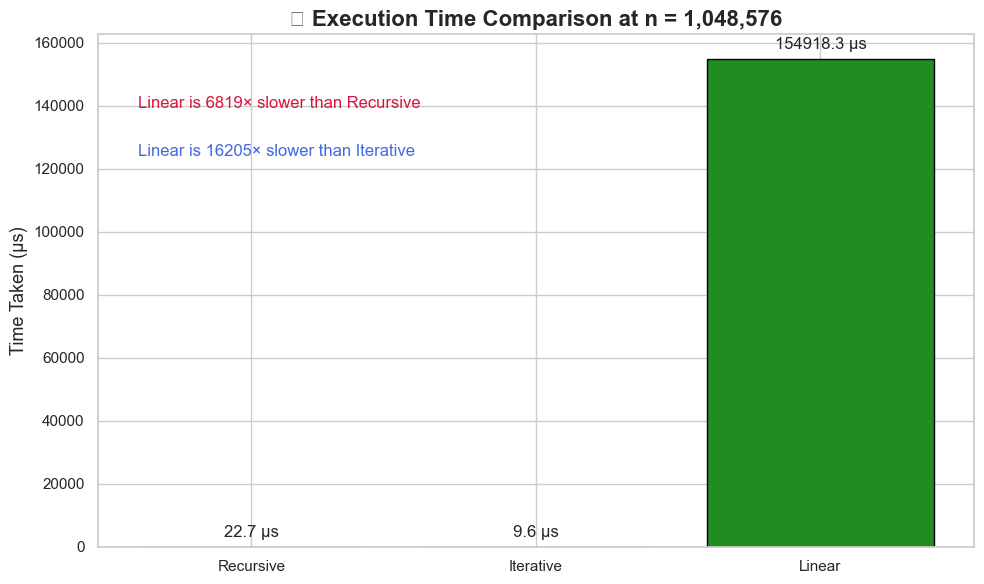


📋 Summary of Average Execution Times (μs):
      n  Recursive (μs)  Iterative (μs)   Linear (μs)
     32        2.559996        1.579995      1.399999
     64        1.760008        1.359993      1.760002
    128        1.720007        1.199997      4.100008
    256        1.600001        1.220009      4.619989
    512        4.060008        2.660003     12.340001
   1024        3.780000        3.079994     18.059998
   2048        4.359998        4.900002     43.939997
   4096        6.120000        4.239997    108.600000
   8192        5.260005        3.620004    113.039993
  16384        8.040009        4.320004    543.259998
  32768       11.439994        9.100005   1706.260000
  65536       11.319993        5.919987   3340.760007
 131072       11.520000        5.660008  12844.719988
 262144       19.160000        6.980001  20093.760005
 524288       43.660001       36.060001  41586.740001
1048576       22.719993        9.559997 154918.340006


In [4]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Recursive Binary Search Function
def binary_search_recursive(arr, target, low, high):
    if low > high:
        return -1
    mid = (low + high) // 2
    if arr[mid] == target:
        return mid
    elif arr[mid] < target:
        return binary_search_recursive(arr, target, mid + 1, high)
    else:
        return binary_search_recursive(arr, target, low, mid - 1)

# Iterative Binary Search Function
def binary_search_iterative(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Linear Search Function
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Measure time taken by different search methods with averaging
def measure_search_times(n, trials=5):
    rec_times, iter_times, lin_times = [], [], []
    for _ in range(trials):
        arr = sorted(random.sample(range(1, 10*n), n))
        target = random.choice(arr)

        start = time.perf_counter()
        binary_search_recursive(arr, target, 0, len(arr) - 1)
        rec_times.append((time.perf_counter() - start) * 1e6)

        start = time.perf_counter()
        binary_search_iterative(arr, target)
        iter_times.append((time.perf_counter() - start) * 1e6)

        start = time.perf_counter()
        linear_search(arr, target)
        lin_times.append((time.perf_counter() - start) * 1e6)

    return np.mean(rec_times), np.mean(iter_times), np.mean(lin_times)

# Experiment for different values of n
sizes = [2**i for i in range(5, 21)]
recursive_times = []
iterative_times = []
linear_times = []

for n in sizes:
    rec_t, iter_t, lin_t = measure_search_times(n)
    recursive_times.append(rec_t)
    iterative_times.append(iter_t)
    linear_times.append(lin_t)

# --- FOCUS: Recursive Binary Search Performance ---
plt.figure(figsize=(14, 7))
plt.plot(sizes, recursive_times, marker='o', color='crimson', linewidth=2, label='Recursive Binary Search')
plt.plot(sizes, [recursive_times[0] * np.log2(n/sizes[0]) for n in sizes], linestyle='--', color='gray', label='O(log n)')
plt.xscale('log')
plt.xlabel('Number of Elements (n)', fontsize=14)
plt.ylabel('Time Taken (μs)', fontsize=14)
plt.title('🧠 Recursive Binary Search: Time Complexity vs Input Size', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("recursive_bs_performance.png", dpi=300)
plt.show()

print("\n📌 Recursive Binary Search Highlights")
print(f"- Fastest Time (@ n={sizes[0]}): {recursive_times[0]:.2f} μs")
print(f"- Slowest Time (@ n={sizes[-1]}): {recursive_times[-1]:.2f} μs")
print("- Expected Time Complexity: O(log n)")
print("- Observed growth matches logarithmic trend\n")

# --- COMPARATIVE PERFORMANCE SECTION ---
plt.figure(figsize=(16, 8))
plt.plot(sizes, recursive_times, marker='o', label='Recursive Binary Search', color='crimson', linewidth=2)
plt.plot(sizes, iterative_times, marker='s', label='Iterative Binary Search', color='royalblue', linewidth=2)
plt.plot(sizes, linear_times, marker='^', label='Linear Search', color='forestgreen', linewidth=2)
plt.xscale('log')
plt.yscale('log')

plt.axhline(y=recursive_times[0]*2, color='crimson', linestyle='--', linewidth=0.7)
plt.text(sizes[1], recursive_times[0]*2*1.3, 'O(log n)', color='crimson', fontsize=12)
plt.axhline(y=linear_times[0]*sizes[-1]/sizes[0], color='green', linestyle='--', linewidth=0.7)
plt.text(sizes[1], linear_times[0]*sizes[-1]/sizes[0]*1.1, 'O(n)', color='forestgreen', fontsize=12)

plt.xlabel('Number of Elements (n)', fontsize=14)
plt.ylabel('Average Time Taken (μs)', fontsize=14)
plt.title('🔁 Comparison: Recursive vs Iterative vs Linear Search (Log-Log Scale)', fontsize=18, weight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("performance_comparison_loglog.png", dpi=300)
plt.show()

# Fancy bar chart for the largest n
plt.figure(figsize=(10, 6))
labels = ['Recursive', 'Iterative', 'Linear']
times = [recursive_times[-1], iterative_times[-1], linear_times[-1]]
colors = ['crimson', 'royalblue', 'forestgreen']

bars = plt.bar(labels, times, color=colors, edgecolor='black')
max_time = max(times)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max_time*0.02, f"{yval:.1f} μs", ha='center', fontsize=12)

# Ratio annotations
ratios = [times[2]/t if t != 0 else 0 for t in times[:2]]
plt.text(-0.4, max_time*0.9, f"Linear is {ratios[0]:.0f}× slower than Recursive", fontsize=12, color='crimson')
plt.text(-0.4, max_time*0.8, f"Linear is {ratios[1]:.0f}× slower than Iterative", fontsize=12, color='royalblue')

plt.title(f'🔍 Execution Time Comparison at n = {sizes[-1]:,}', fontsize=16, weight='bold')
plt.ylabel('Time Taken (μs)', fontsize=13)
plt.tight_layout()
plt.savefig("bar_chart_max_n.png", dpi=300)
plt.show()

# Summary table output
summary_df = pd.DataFrame({
    'n': sizes,
    'Recursive (μs)': recursive_times,
    'Iterative (μs)': iterative_times,
    'Linear (μs)': linear_times
})
print("\n📋 Summary of Average Execution Times (μs):")
print(summary_df.to_string(index=False))
